<a href="https://colab.research.google.com/github/Soyeon-ErinLee/Machine_Learning/blob/master/Heatmap0806.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/mydrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mydrive


In [ ]:
import pandas as pd
today=pd.read_csv("/content/mydrive/Shared drives/2020 KU datathon/data/0225SSSdata.csv")
today = today.drop("Unnamed: 0",axis=1)
today.head(6)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time_stamp_s,fire,dust,temperature,humidity,co2,moving,door,roomid,floor,co2score,dustscore,humidscore,temp1score,temp2score,totalscore,SSS
0,2020-02-25 00:00:29,0,38,21.193508,29.266388,887,0,0,202,floor2,40,80,50,50,75,55.0,3
1,2020-02-25 00:01:29,0,37,21.193508,29.266388,883,0,0,202,floor2,40,80,50,50,75,55.0,3
2,2020-02-25 00:02:29,0,38,21.182783,29.274017,881,0,0,202,floor2,40,80,50,50,75,55.0,3
3,2020-02-25 00:03:29,0,39,21.182783,29.258759,877,0,0,202,floor2,40,80,50,50,75,55.0,3
4,2020-02-25 00:04:29,0,36,21.172058,29.258759,877,0,0,202,floor2,40,80,50,50,75,55.0,3
5,2020-02-25 00:05:29,0,38,21.182783,29.266388,875,0,0,202,floor2,40,80,50,50,75,55.0,3


In [ ]:
#####################################################################################################################################################

In [ ]:
# heatmap은 보류, 밑으로 가시오!!
!pip install heatmappy

In [ ]:
!pip install pillow --upgrade

In [ ]:
from heatmappy import Heatmapper
from PIL import Image

In [ ]:
# 각 룸별 좌표 태깅 필요 

In [ ]:
r301 = (655, 365)
r302 = (650, 430)
r303 = (647, 490)
r304 = (645, 545)
r305 = (640, 610)
r306 = (645, 865)

In [ ]:
points = [r301, r302, r303, r304, r305, r306]
Floor3 = '/content/mydrive/Shared drives/2020 KU datathon/Visualization/Floor3.jpg'
Floor3 = Image.open(Floor3)

In [ ]:
heatmapper = Heatmapper(point_diameter=100, point_strength=0.9, colours='default')

In [ ]:
heatmap = heatmapper.heatmap_on_img(points, Floor3)

In [ ]:
heatmap.save('/content/mydrive/Shared drives/2020 KU datathon/Visualization/heatmap.png')

In [ ]:
####################################################################################################################

In [ ]:
import numpy as np

colorconditions = [
                 (today.SSS==1),
                 (today.SSS==2),
                 (today.SSS==3),
                 (today.SSS==4),
                 (today.SSS==5)
]
colorchoices= ['r','o','y','g','b']
today["color"]= np.select(colorconditions, colorchoices)
today 

,time_stamp_s,fire,dust,temperature,humidity,co2,moving,door,roomid,floor,co2score,dustscore,humidscore,temp1score,temp2score,totalscore,SSS,color
0,2020-02-25 00:00:29,0,38,21.193508,29.266388,887,0,0,202,floor2,40,80,50,50,75,55.0,3,y
1,2020-02-25 00:01:29,0,37,21.193508,29.266388,883,0,0,202,floor2,40,80,50,50,75,55.0,3,y
2,2020-02-25 00:02:29,0,38,21.182783,29.274017,881,0,0,202,floor2,40,80,50,50,75,55.0,3,y
3,2020-02-25 00:03:29,0,39,21.182783,29.258759,877,0,0,202,floor2,40,80,50,50,75,55.0,3,y
4,2020-02-25 00:04:29,0,36,21.172058,29.258759,877,0,0,202,floor2,40,80,50,50,75,55.0,3,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281763,2020-02-25 23:55:29,0,21,19.563293,35.690338,883,0,0,B141,floorB,40,80,100,50,75,67.5,4,g
281764,2020-02-25 23:56:29,0,20,19.563293,35.667450,869,0,0,B141,floorB,40,80,100,50,75,67.5,4,g
281765,2020-02-25 23:57:29,0,21,19.552568,35.636932,874,0,0,B141,floorB,40,80,100,50,75,67.5,4,g
281766,2020-02-25 23:58:29,0,21,19.541843,35.659821,882,0,0,B141,floorB,40,80,100,50,75,67.5,4,g


In [ ]:
import numpy as np
today['time_stamp_s'] = pd.to_datetime(today['time_stamp_s'])
today0900 = today[today['time_stamp_s'].dt.time.astype(str)=='09:00:29']

In [ ]:
# create circles with random locations 
floor3roomid = today0900[today0900['floor']=='floor3'].roomid
N = floor3roomid.shape[0] # number of circles 
x = np.random.randint(130,910,N) 
y = np.random.randint(360,1330,N) 
floor3roomid = np.array(today0900[today0900['floor']=='floor3'].roomid)

In [ ]:
# colors
c=[]
for i in range(N):
  c.append(tuple(today0900[today0900['roomid']==floor3roomid[i]]['color'].values))
c = list(sum(c,()))

In [ ]:
from matplotlib.patches import Circle 
patch = [] 
for x1, y1, c1 in zip(x, y, c): 
    circle = Circle((x1, y1),30,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 

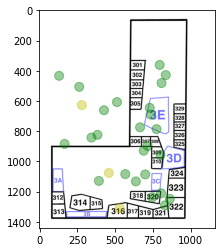

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('/content/mydrive/Shared drives/2020 KU datathon/Visualization/floor3.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

from matplotlib.collections import PatchCollection 

p=PatchCollection(patch, c)
ax.add_collection(p)

plt.show()